In [41]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import dijet
import random
from IPython.display import display, Math
from tqdm import tqdm

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 25  
plt.rcParams["xtick.labelsize"] = 20  
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 18  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'
# plt.rcParams['axes.xmargin'] = 0

In [42]:
# calculate bands for correlations

files = ['data/dsa_xi04_pTtz02_rs50_pn.npy',
         'data/dsa_xi04_pTtz035_rs50_pn.npy',
         'data/dsa_xi04_pTtz05_rs50_pn.npy'
        ]

zs = [0.2, 0.35, 0.5]
data = {}
for iz, z in enumerate(zs): data[z] = np.load(files[iz], allow_pickle=True).item()

for z in zs:
    for fit in ['p', 'n']:
        for irep in range(len(data[z][fit])):
            data[z][fit][irep]['<cos(phi_Dp + phi_kp)>'] = data[z][fit][irep]['<cos(phi_Dp)cos(phi_kp)>'] - data[z][fit][irep]['<sin(phi_Dp)sin(phi_kp)>']
            data[z][fit][irep]['<cos(phi_Dp - phi_kp)>'] = data[z][fit][irep]['<cos(phi_Dp)cos(phi_kp)>'] + data[z][fit][irep]['<sin(phi_Dp)sin(phi_kp)>']
        
targets = ['p', 'd', 'h']
corrs = ['<1>', '<cos(phi_Dp)>', '<cos(phi_Dp)cos(phi_kp)>', '<sin(phi_Dp)sin(phi_kp)>', '<cos(phi_Dp + phi_kp)>', '<cos(phi_Dp - phi_kp)>']

for z in zs:
    for tar in targets:
        if tar == 'd':
            p,n = 1,1
            omega_d = 0.07
            Pp = 1-1.5*omega_d
            Pn = Pp
    
        elif tar == 'h':
            p,n = 2,1
            pS,pD,pSp = 0.9,0.1,0.02
            Pp = -(4./3.)*(pD-pSp)
            Pn = pS - (1./3.)*(pD-pSp)
    
        elif tar == 'p': continue
    
        print(tar, (Pp*p)/(p+n), (Pn*n)/(p+n))
    
        data[z][tar] = []
        for irep in range(len(data[z]['p'])):
            tar_rep = {}
            for corr in corrs:
                p_rep = data[z]['p'][irep][corr]
                n_rep = data[z]['n'][irep][corr]
    
                tar_rep[corr] = (p*Pp*p_rep + n*Pn*n_rep)/(p+n)
                # tar_rep[corr] = Pp*p_rep + Pn*n_rep
    
            data[z][tar].append(tar_rep)
        
confid = 68

bands = {}
for z in zs:
    bands[z] = {}
    for tar in targets:
        bands[z][tar] = {}
        for obj in ['lower', 'upper', 'mean']:
            bands[z][tar][obj] = {}
    
        for corr in corrs:
            corr_reps = [rep[corr] for rep in data[z][tar]]
            bands[z][tar]['lower'][corr] = np.percentile(corr_reps, 0.5*(100-confid), axis=0)
            bands[z][tar]['upper'][corr] = np.percentile(corr_reps, 100 - 0.5*(100-confid), axis=0)
            bands[z][tar]['mean'][corr] = np.mean(corr_reps, axis=0)


lumi = 100
errors = {}
for z in zs:
    errors[z] = {}
    errors[z]['all'] = np.sqrt(1/(2*lumi*np.array(data[z]['p'][0]['denom'])))
    errors[z]['corr'] = np.sqrt(2/(2*lumi*np.array(data[z]['p'][0]['denom'])))

pT_values = data[zs[0]]['pT values']
roots = data[zs[0]]['roots']
space = data[zs[0]]['space']
r0 = data[zs[0]]['r0']

space_labels = {
    'y' : r'y',
    'z' : r'z',
    'Q2': r'Q^2',
    't' : r't',
    'phi_Dp': r'\phi_{\Delta p}',
    'phi_kp': r'\phi_{k p}'
}

var_labels = [r'p_{\perp}']
for key in space:
    if isinstance(space[key], list): continue
    var_labels.append(space_labels[key])

num_label = '{}' if len(var_labels)==1 else fr'{len(var_labels)}'
den_label = ''.join(['d' + v for v in var_labels])

info_text = fr'$\sqrt{{s}} = {roots}\,\, \mathrm{{GeV}}$' + '\n'

for var in space:
    if isinstance(space[var], list): 
        low = space[var][0]
        high = space[var][1]
        if var == 'Q2':
            info_text += fr'$\overline{{Q}}_0 \, = \,{r0}\, \mathrm{{GeV}}$' + '\n'
        elif var == 'y':
            info_text += fr'$y \, \in \, [{round(low,3)}, \, {round(high,3)}]$' + '\n'
        # elif var == 'z':
        #     info_text += fr'$z \, \in \, [{round(low,2)}, \, {round(high,2)}]$' + '\n'
        elif var == 't':
            info_text += fr'$t \, \in \,  [{round(low,2)}, \, {round(high,2)}]\, \mathrm{{GeV}}^2$'
    else:
        value = space[var]
        if var == 'Q2':
            info_text += fr'$Q^2 \, = \,{value}\, \mathrm{{GeV^2}}$' + '\n'
        elif var == 'y':
            info_text += fr'$y \, = \, {value}$' + '\n'
        # elif var == 'z':
        #     info_text += fr'$z \, = \, {value}$' + '\n'
        elif var == 't':
            info_text += fr'$t \, = \,  {value}\, \mathrm{{GeV}}^2$'


d 0.4475 0.4475
h -0.07111111111111111 0.29111111111111115
d 0.4475 0.4475
h -0.07111111111111111 0.29111111111111115
d 0.4475 0.4475
h -0.07111111111111111 0.29111111111111115


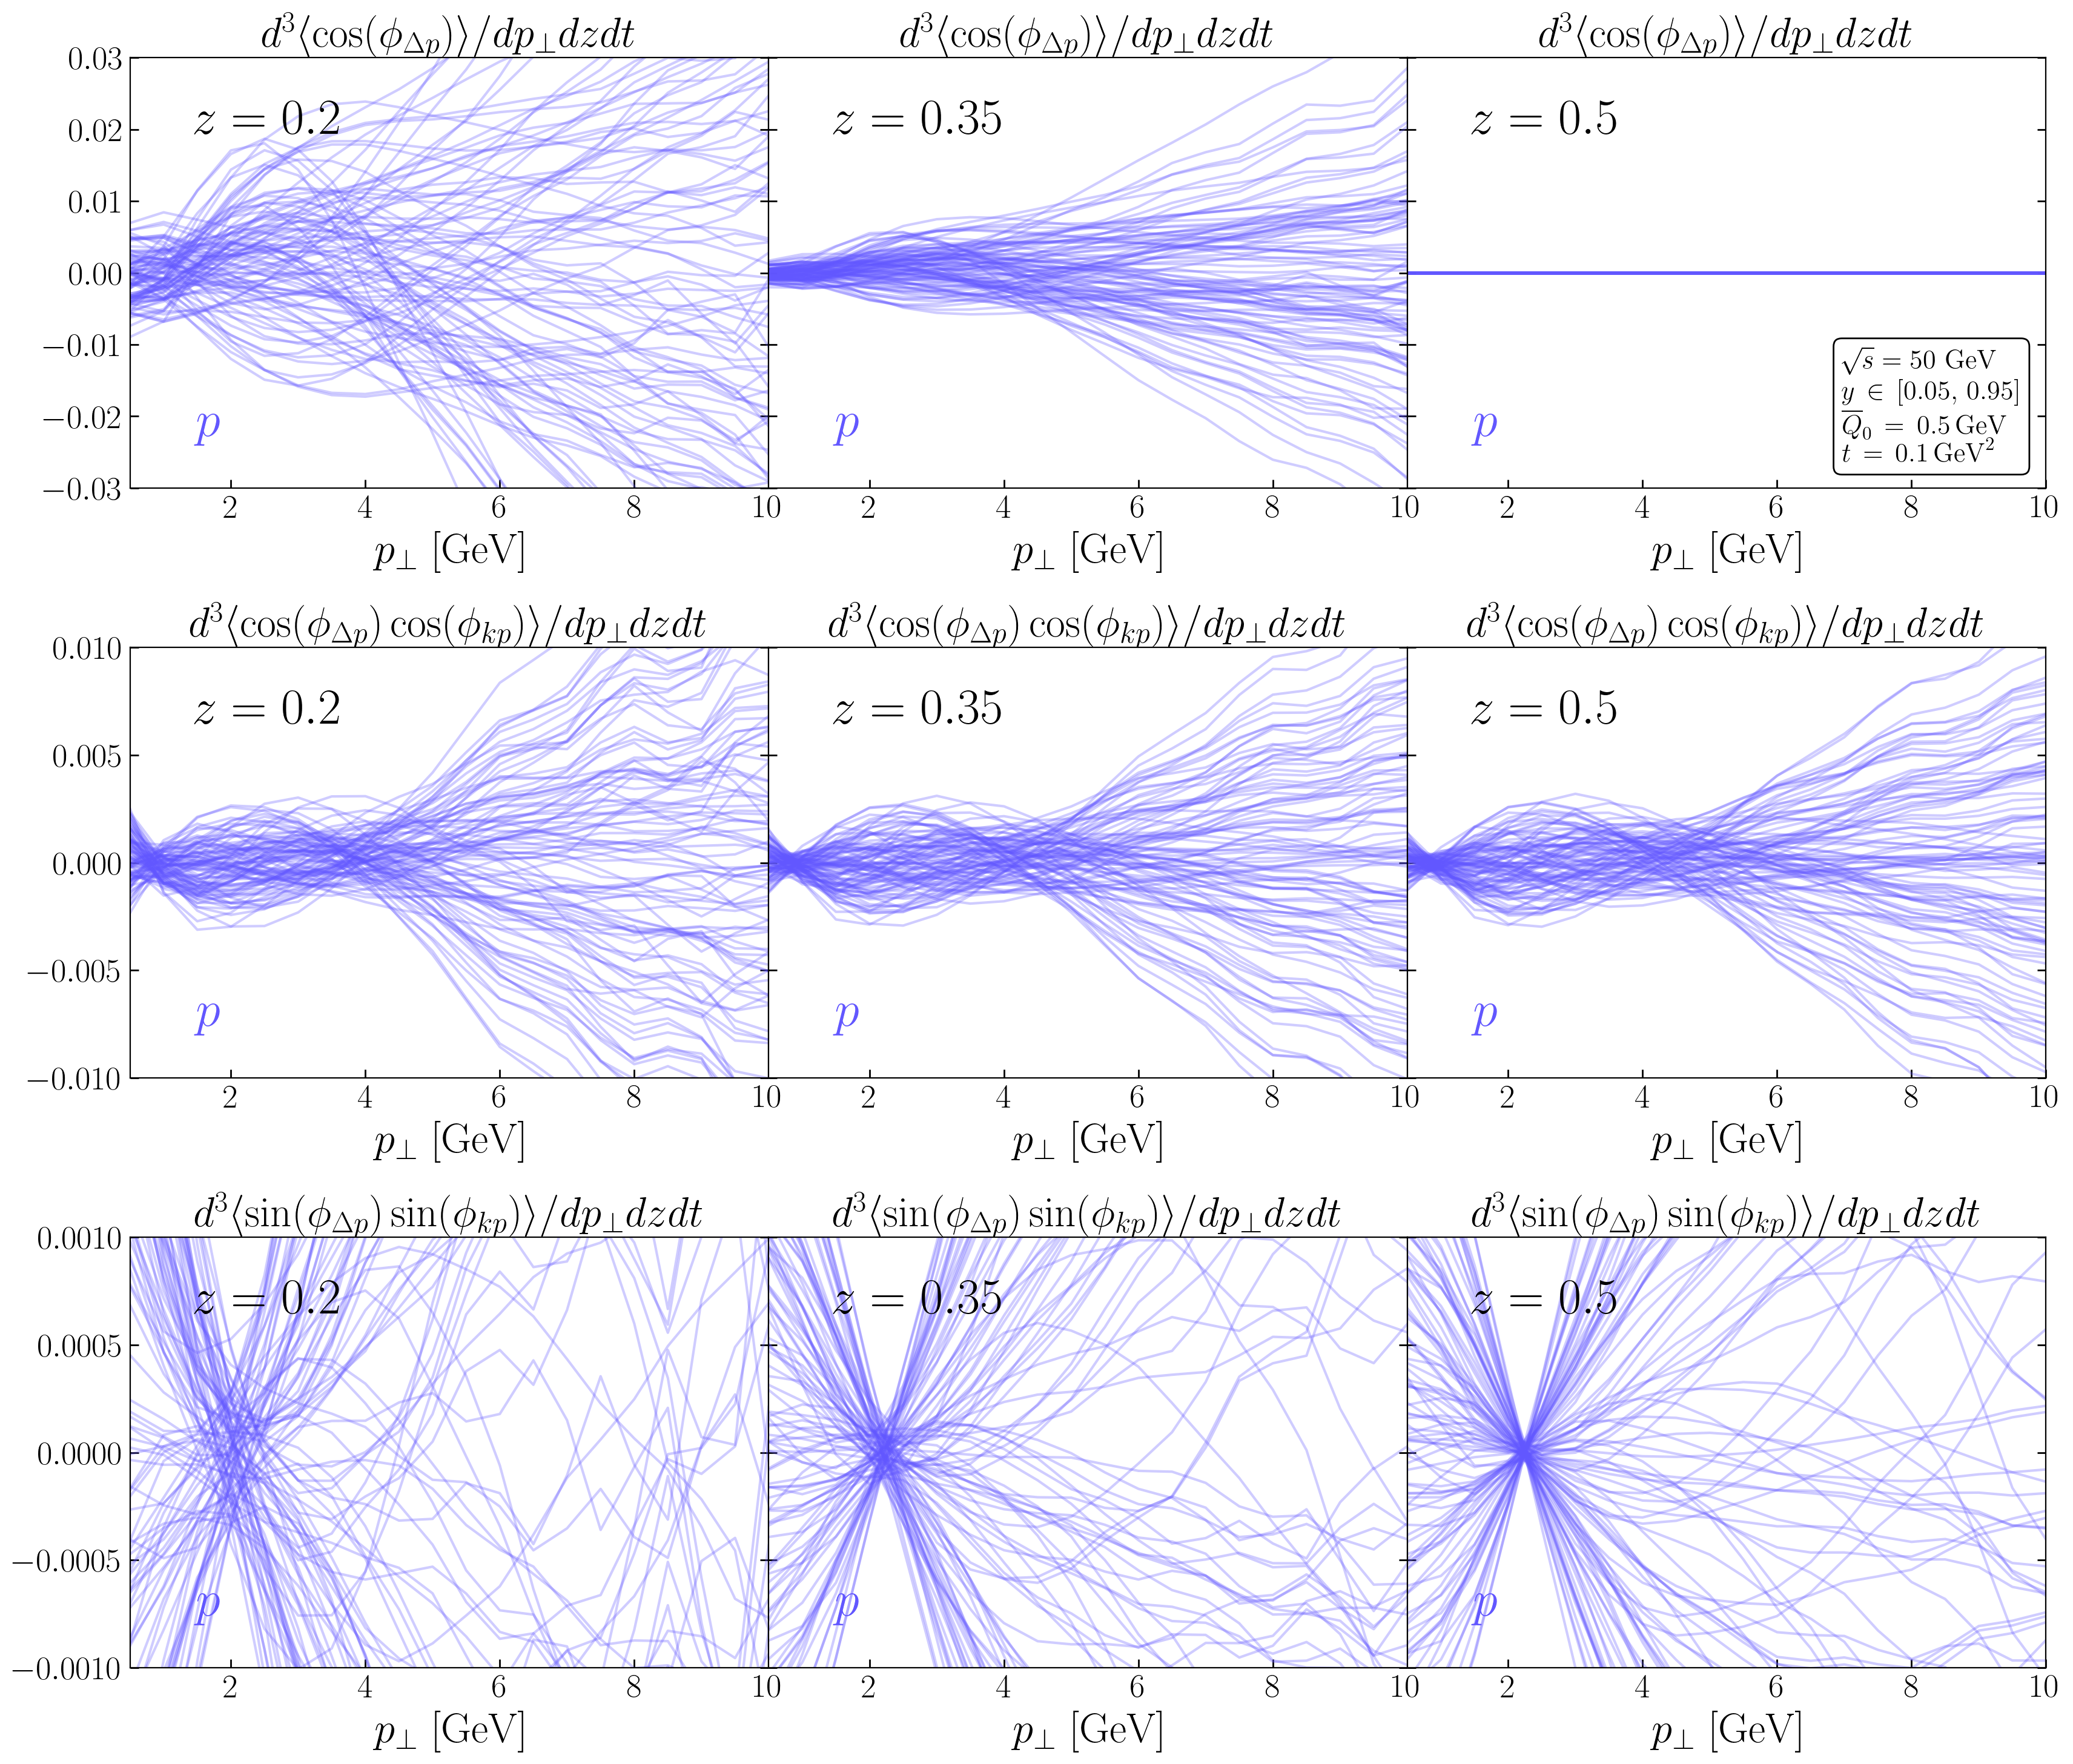

In [62]:
# plot azimuthal correlations
asp_ratio = 3.5/3
psize = 5

nrows, ncols = 3, 3
fig, ax = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows), sharey='row')

plot_bands = False
alt_defs = False
plot_stat_errors = False
plot_nums = False

# colors = ['red', 'blue', 'green']
colors = ['#6257ff', '#FF6961', '#51c46f']
# colors = ['#6257ff', '#6257ff', '#6257ff']
# labels = ['DIS+SIDIS', '+pp', '+pp (constrained moments)']

# colors = ['#51c46f', '#6257ff']
# labels = ['+pp', '+pp (constrained moments)']

# corrs = ['<1>', '<cos(phi_Dp)>', '<cos(phi_Dp)cos(phi_kp)>', '<sin(phi_Dp)sin(phi_kp)>']
corrs = ['<cos(phi_Dp)>', '<cos(phi_Dp)cos(phi_kp)>', '<sin(phi_Dp)sin(phi_kp)>']
if alt_defs: corrs = ['<cos(phi_Dp)>', '<cos(phi_Dp + phi_kp)>', '<cos(phi_Dp - phi_kp)>']

tar = 'p'
tar_col = {'p':0, 'd':1, 'h':2}
for iz, z in enumerate(zs):
    for icorr, corr in enumerate(corrs):

        if plot_bands:
            # axs[icorr].plot(pT_values, bands[fit]['mean'][corr], color=colors[ifit])
            ax[icorr, iz].fill_between(pT_values, bands[z][tar]['lower'][corr], bands[z][tar]['upper'][corr], color=colors[tar_col[tar]], alpha=0.5)
        
        else:
            for irep, rep in enumerate(data[z][tar]):
                if plot_nums: 
                    ax[icorr, iz].plot(pT_values, np.abs(np.array(rep[corr])*data[z]['p'][0]['denom']*lumi), alpha=0.3, color=colors[tar_col[tar]])
                else:
                    ax[icorr, iz].plot(pT_values, np.array(rep[corr]), alpha=0.3, color=colors[tar_col[tar]])

        if plot_stat_errors and not plot_nums:
            ax[icorr, iz].errorbar(
                    pT_values[1:-1], np.zeros(errors[z]['corr'][1:-1].shape), yerr=np.sqrt(10)*errors[z]['corr'][1:-1], fmt='o',
                    capsize=3, elinewidth=1, capthick=1, color='gray', markersize=0, 
                    label=rf'Absolute error ({round(lumi/10)} $\mathrm{{fb}}^{{-1}}$)'
            )
            ax[icorr, iz].errorbar(
                    pT_values[1:-1], np.zeros(errors[z]['corr'][1:-1].shape), yerr=errors[z]['corr'][1:-1], fmt='o',
                    capsize=3, elinewidth=1.5, capthick=1.5, color='black', markersize=0, 
                    label=rf'Absolute error ({lumi} $\mathrm{{fb}}^{{-1}}$)'
            )


tar_labels = [r'$p$', r'$d$', r'$^3\mathrm{He}$']
for iz, z in enumerate(zs):    
    # ax[itar, 0].axhline(y=0, color='lightgray', linestyle='--')
    ax[0, iz].set_xlabel(r'$p_\perp$ [GeV]')
    ax[0, iz].set_title(fr'$ d^{num_label} \langle \cos(\phi_{{\Delta p}}) \rangle / {den_label} $', size=25)
    ax[0, iz].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=False)
    ax[0, iz].set_ylim([-0.03, 0.03])
    # ax[0,iz].semilogy()
    
    # ax[itar, 1].axhline(y=0, color='lightgray', linestyle='--')
    ax[1, iz].set_xlabel(r'$p_{\perp}$ [GeV]')
    if alt_defs:
        ax[1, iz].set_title(fr'$ d^{num_label}  \langle \cos(\phi_{{\Delta p}} + \phi_{{k p}}) \rangle / {den_label} $', size=25)
    else: 
        ax[1, iz].set_title(fr'$ d^{num_label}  \langle \cos(\phi_{{\Delta p}}) \cos(\phi_{{k p}}) \rangle / {den_label} $', size=25)
    ax[1,iz].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=False)
    # ax[1, iz].legend(frameon=False)
    ax[1, iz].set_ylim([-0.01, 0.01])

    # ax[2,iz].axhline(y=0, color='lightgray', linestyle='--')
    ax[2,iz].set_xlabel(r'$p_{\perp}$ [GeV]')
    if alt_defs:
        ax[2,iz].set_title(fr'$ d^{num_label} \langle \cos(\phi_{{\Delta p}} - \phi_{{k p}})  \rangle / {den_label} $', size=25)
    else:
        ax[2,iz].set_title(fr'$ d^{num_label} \langle \sin(\phi_{{\Delta p}}) \sin(\phi_{{k p}})  \rangle / {den_label} $', size=25)
    ax[2,iz].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=False)
    # ax[2,iz].legend(frameon=False)
    ax[2,iz].set_ylim([-0.001, 0.001])
    # axs[1].legend()


    for i in range(3):
        ax[i, iz].text(
            0.1, 0.8, fr'$z={z}$',
            transform=ax[i, iz].transAxes,
            ha='left', va='bottom', 
            fontsize=30, wrap=True, 
            # color=colors[iz],
            # bbox=dict(boxstyle='round', facecolor='white', alpha=1.0, edgecolor='black')
        )
        ax[i, iz].text(
            0.1, 0.1, tar_labels[tar_col[tar]],
            transform=ax[i, iz].transAxes,
            ha='left', va='bottom', 
            fontsize=30, wrap=True, 
            color=colors[tar_col[tar]],
            # bbox=dict(boxstyle='round', facecolor='white', alpha=1.0, edgecolor='black')
        )
ax[0, 2].text(
    0.68, 0.05, info_text, 
    transform=ax[0, 2].transAxes,
    ha='left', va='bottom', 
    fontsize=16, wrap=True, 
    bbox=dict(boxstyle='round', facecolor='white', alpha=1.0, edgecolor='black')
)

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.subplots_adjust(wspace=0)
plt.show()

if plot_bands:
    fig.savefig('plots/dsa_band_zdep.pdf', dpi=400, bbox_inches="tight")
else:
    fig.savefig('plots/dsa_lines_zdep.pdf', dpi=400, bbox_inches="tight")
